In [1]:
import pandas as pd
import numpy as np
import csv
import os
import twilio
import math
from datetime import datetime, timedelta 
import pywhatkit
import sched, time
from scipy import stats
from itertools import compress

from binance.client import Client
from binance.websockets import BinanceSocketManager
from binance.enums import *
from binance.exceptions import BinanceAPIException, BinanceOrderException

from twisted.internet import reactor
from matplotlib import pyplot as plt

import telebot
import telethon
import requests
import json

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#parameters

api_key = 'yourkey'
api_secret = 'yoursecret'
interval = '15m' 
days_data = 30
client = Client(api_key, api_secret)

tele_token = 'your_taken'
tele_chat_id = 'your_id'

roll1 = 5
roll2 = 14
roll3 = 20

len_pattern = 3

In [3]:

# # get market depth
# depth = client.get_order_book(symbol='BNBBTC')

# # place a test market buy order, to place an actual order use the create_order function
# order = client.create_test_order(
#     symbol='BNBBTC',
#     side=Client.SIDE_BUY,
#     type=Client.ORDER_TYPE_MARKET,
#     quantity=100)

In [4]:
# get balance for a specific asset only (BTC)
print(client.get_asset_balance(asset='ETH'))

{'asset': 'ETH', 'free': '0.00001720', 'locked': '0.00000000'}


# functions

In [5]:
def send_notification(string, d):
    p_list = ['list of numbers']
    num = [1,2,3]
    c = 1
    for ph in p_list:
        print('Sending to:' , ph)
        pywhatkit.sendwhatmsg(ph, string, d.hour, d.minute+c)
        c += 1
    print('success!')

In [6]:
# create a real order with raise an exception

def fire_an_order(sym , qty):
    try:
        buy_limit = client.create_order(symbol=sym, side='BUY', type='MARKET',quantity = qty )
        return buy_limit
    except BinanceAPIException as e:
        # error handling goes here
        return e
    except BinanceOrderException as e:
        # error handling goes here
        return e

In [7]:
def sell_off(sym , qty):
    try:
        sell = client.order_market_sell(symbol=sym, quantity= qty )
        return sell
    except BinanceAPIException as e:
        # error handling goes here
        return e
    except BinanceOrderException as e:
        # error handling goes here
        return e

In [8]:
def get_precision(cryp):
    symbol_info = client.get_symbol_info(cryp)
    step_size = 0.0
    for f in symbol_info['filters']:
        if f['filterType'] == 'LOT_SIZE':
            step_size = float(f['stepSize'])
    return int(round(-math.log(step_size, 10), 0))

In [9]:
def strictly_increasing(L):
    return all(x<y for x, y in zip(L, L[1:]))

In [10]:
def send_telegram_message(tele_token,tele_chat_id, message):
    """Sends message via Telegram"""
    url = "https://api.telegram.org/" + tele_token + "/sendMessage"
    data = {"chat_id": tele_chat_id, "text": message}
    try:
        response = requests.request( "POST",  url,  params=data)
        telegram_data = json.loads(response.text)
        return telegram_data["ok"]
    except: 
        pass

In [13]:
#fire_an_order('CELRUSDT' , qty)

In [7]:
# def btc_trade_history(msg):
#     ''' define how to process incoming WebSocket messages '''
#     if msg['e'] != 'error':
#         print(msg['c'])
#         btc_price['last'] = msg['c']
#         btc_price['bid'] = msg['b']
#         btc_price['last'] = msg['a']
#     else:
#         btc_price['error'] = True

In [8]:
# # init
# api_key = os.environ.get('binance_api')
# api_secret = os.environ.get('binance_secret')

# client = Client(api_key, api_secret)
# btc_price = {'error':False}

# # init and start the WebSocket
# bsm = BinanceSocketManager(client)
# conn_key = bsm.start_symbol_ticker_socket('BTCUSDT', btc_trade_history)
# bsm.start()

In [9]:
# # stop websocket
# bsm.stop_socket(conn_key)

# # properly terminate WebSocket
# reactor.stop()

In [11]:
coin_list = ['BTCUSDT',	'ETHUSDT',	'BNBUSDT',	'DOGEUSDT',	'ADAUSDT',	'XRPUSDT',	'DOTUSDT',	'BCHUSDT',	'LTCUSDT',	'LINKUSDT',	'UNIUSDT',	'VETUSDT',	'XLMUSDT',	'ETCUSDT',	'SOLUSDT',	'THETAUSDT',	'TRXUSDT',	'FILUSDT',	'WBTCUSDT',	'EOSUSDT',	'XMRUSDT',	'NEOUSDT',	'LUNAUSDT',	'BSVUSDT',	'CAKEUSDT',	'MIOTAUSDT',	'ATOMUSDT',	'FTTUSDT',	'AAVEUSDT',	'SHIBUSDT',	'KLAYUSDT',	'XTZUSDT',	'MKRUSDT',	'MATICUSDT',	'HTUSDT',	'AVAXUSDT',	'BTTUSDT',	'DAIUSDT',	'ALGOUSDT',	'CROUSDT',	'RUNEUSDT',	'DASHUSDT',	'COMPUSDT',	'KSMUSDT',	'ZECUSDT',	'XEMUSDT',	'WAVESUSDT',	'EGLDUSDT',	'BTCBUSDT',	'LEOUSDT',	'DCRUSDT',	'CHZUSDT',	'ZILUSDT',	'QTUMUSDT',	'HOTUSDT',	'HBARUSDT',	'TELUSDT',	'FTMUSDT',	'MANAUSDT',	'NEXOUSDT',	'ONTUSDT',	'BTGUSDT',	'STXUSDT',	'USTUSDT',	'BATUSDT',	'TFUELUSDT',	'SNXUSDT',	'DGBUSDT',	'ENJUSDT',	'SUSHIUSDT',	'OKBUSDT',	'YFIUSDT',	'GRTUSDT',	'NEARUSDT',	'SCUSDT',	'CELUSDT',	'ICXUSDT',	'OMGUSDT',	'UMAUSDT',	'ZENUSDT',	'ZRXUSDT',	'BCDUSDT',	'RVNUSDT',	'BNTUSDT',	'HNTUSDT',	'XVSUSDT',	'CHSBUSDT',	'NANOUSDT',	'ONEUSDT',	'CELOUSDT',	'XVGUSDT',	'RSRUSDT',	'BAKEUSDT',	'REVUSDT',	'ANKRUSDT',	'1INCHUSDT',	'KCSUSDT',	'LSKUSDT',	'IOSTUSDT',	'RENUSDT',	'CRVUSDT',	'VGXUSDT',	'FLOWUSDT',	'DENTUSDT',	'ARUSDT',	'RENBTCUSDT',	'CFXUSDT',	'HUSDUSDT',	'WRXUSDT',	'LPTUSDT',	'SNTUSDT',	'LRCUSDT',	'KNCUSDT',	'OCEANUSDT',	'BTMXUSDT',	'CKBUSDT',	'STORJUSDT',	'PROMUSDT',	'VTHOUSDT',	'BTCSTUSDT',	'GTUSDT',	'SKLUSDT',	'MDXUSDT',	'REEFUSDT',	'RLCUSDT',	'SRMUSDT',	'WOOUSDT',	'REPUSDT',	'GLMUSDT',	'IOTXUSDT',	'QNTUSDT',	'ALPHAUSDT',	'ABBCUSDT',	'INJUSDT',	'BALUSDT',	'SXPUSDT',	'CTSIUSDT',	'FUNUSDT',	'EWTUSDT',	'OGNUSDT',	'ZKSUSDT',	'STEEMUSDT',	'KAVAUSDT',	'KMDUSDT',	'STRAXUSDT',	'GNOUSDT',	'ARDRUSDT',	'STMXUSDT',	'USDNUSDT',	'ANTUSDT',	'FETUSDT',	'DODOUSDT',	'WINUSDT',	'CVCUSDT',	'BTSUSDT',	'WAXPUSDT',	'NKNUSDT',	'MCOUSDT',	'MAIDUSDT',	'BANDUSDT',	'SANDUSDT',	'XHVUSDT',	'AGIUSDT',	'UTKUSDT',	'SWAPUSDT',	'SYSUSDT',	'NMRUSDT',	'MEDUSDT',	'ORBSUSDT',	'WANUSDT',	'JSTUSDT',	'BADGERUSDT',	'NUUSDT',	'BTMUSDT',	'UQCUSDT',	'CELRUSDT',	'KINUSDT',	'ARKUSDT',	'UBTUSDT',	'PPTUSDT',	'VLXUSDT',	'ONGUSDT',	'ZBUSDT',	'MTLUSDT',	'AIONUSDT',	'AVAUSDT',	'VAIUSDT',	'AMPLUSDT',	'POLYUSDT',	'HNSUSDT',	'XORUSDT',	'COTIUSDT',	'RIFUSDT',	'ALICEUSDT',	'SNMUSDT'] 

In [13]:
# #Full data load
# def flow_data(cryp, inter, latest): 
#     try:
#         # valid intervals - 1m, 3m, 5m, 15m, 30m, 1h, 2h, 4h, 6h, 8h, 12h, 1d, 3d, 1w, 1M
#         print('Importing data for:', cryp)
#         # get timestamp of earliest date data is available
#         #timestamp = client._get_earliest_valid_timestamp(cryp, inter, 'spot')
#         flow = client.get_historical_klines(cryp, inter, latest.strftime("%d %B, %Y"))
#         for line in flow:
#             del line[9:]

#         #create a Pandas DataFrame and export to CSV
#         df = pd.DataFrame(flow, columns=['date','open','high','low','close','volume','close_time','quote_ast_vol','total_trade'])
#         df.set_index('date', inplace=True)
#         df.drop(columns = ['close_time', 'quote_ast_vol'], inplace = True)
#         df = df.apply(pd.to_numeric)
#         df['crypto'] = cryp
#         #df.drop(df.tail(1).index,inplace=True)
#         return df
#     except:
#         pass
    
# duration = datetime.today() - timedelta(days = days_data)
# crypto_data = pd.DataFrame() 
# for cr in coin_list:
#     crypto_data = crypto_data.append(flow_data(cr, interval, duration))

# path = 'C:\\Users\\shivshre\\OneDrive - AGCO Corp\\Documents\\binance\\' +'all_crypto_data_'+interval +'.csv'
# crypto_data.to_csv(path)

Importing data for: BTCUSDT
Importing data for: ETHUSDT
Importing data for: BNBUSDT
Importing data for: DOGEUSDT
Importing data for: ADAUSDT
Importing data for: XRPUSDT
Importing data for: DOTUSDT
Importing data for: BCHUSDT
Importing data for: LTCUSDT
Importing data for: LINKUSDT
Importing data for: UNIUSDT
Importing data for: VETUSDT
Importing data for: XLMUSDT
Importing data for: ETCUSDT
Importing data for: SOLUSDT
Importing data for: THETAUSDT
Importing data for: TRXUSDT
Importing data for: FILUSDT
Importing data for: WBTCUSDT
Importing data for: EOSUSDT
Importing data for: XMRUSDT
Importing data for: NEOUSDT
Importing data for: LUNAUSDT
Importing data for: BSVUSDT
Importing data for: CAKEUSDT
Importing data for: MIOTAUSDT
Importing data for: ATOMUSDT
Importing data for: FTTUSDT
Importing data for: AAVEUSDT
Importing data for: SHIBUSDT
Importing data for: KLAYUSDT
Importing data for: XTZUSDT
Importing data for: MKRUSDT
Importing data for: MATICUSDT
Importing data for: HTUSDT
Import

In [12]:
path = 'C:\\Users\\shivshre\\OneDrive - AGCO Corp\\Documents\\binance\\' +'all_crypto_data_'+interval +'.csv'
crypto_data = pd.read_csv(path)
crypto_data.set_index('date', inplace=True)

In [13]:
# Delta data: fetch parametrizedklines  
#client.get_historical_klines('BTCUSDT', '1h', your_dt.strftime("%d %B, %Y"))
def flow_data_delta(cryp, interv): 
    # valid intervals - 1m, 3m, 5m, 15m, 30m, 1h, 2h, 4h, 6h, 8h, 12h, 1d, 3d, 1w, 1M
    #print('Importing data for:', cryp)
    latest = datetime.fromtimestamp(int(crypto_data[(crypto_data.crypto == cryp)].index.max())/1000)
    flow = client.get_historical_klines(cryp, interv, latest.strftime("%d %B, %Y"))
    for line in flow:
        del line[9:]

    #create a Pandas DataFrame and export to CSV
    df = pd.DataFrame(flow, columns=['date','open','high','low','close','volume','close_time','quote_ast_vol','total_trade'])
    df.set_index('date', inplace=True)
    df.drop(columns = ['close_time', 'quote_ast_vol'], inplace = True)
    df = df.apply(pd.to_numeric)
    df['crypto'] = cryp
    #df.drop(df.tail(1).index,inplace=True)
    #crypto_data = crypto_data.append(df)
    return df

In [14]:
#crypto_data = pd.DataFrame() 
def delta_caller(crypto_data):

    print('Started delta data flow...')
    for cr in crypto_data.crypto.unique(): #['BTCUSDT', 'NEOUSDT']:
        crypto_data = crypto_data.append(flow_data_delta(cr, interval))
    print('Success delta data flow!!!')
    #crypto_data.drop_duplicates( inplace =True)  
    crypto_data = crypto_data.reset_index().drop_duplicates(["crypto", 'date']).set_index('date')
    path = 'C:\\Users\\shivshre\\OneDrive - AGCO Corp\\Documents\\binance\\' +'all_crypto_data_'+interval +'.csv'
    crypto_data.to_csv(path)
    return crypto_data
#latest = datetime.fromtimestamp(int(crypto_data[(crypto_data.crypto == 'BNBUSDT')].index.max())/1000)
# latest = datetime.fromtimestamp(int(crypto_data.index.max())/1000)
# print('Data imported till:', latest.strftime("%d %B %Y,  %H %M"))



# bollinger band

In [15]:
def flow_data_level_up(listed, interv, days_data): 
    #print('Importing data for:', cryp)
    valid_intervals =  ['1m', '3m', '5m', '15m', '30m', '1h', '2h', '4h', '6h', '8h', '12h', '1d', '3d', '1w', '1M']
    interv = valid_intervals[valid_intervals.index(interv)+2]
    duration = datetime.today() - timedelta(days = days_data)
    df_push = pd.DataFrame()
    
    for cryp in listed: 
        flow = client.get_historical_klines(cryp, interv, duration.strftime("%d %B, %Y"))
        for line in flow:
            del line[9:]
        #create a Pandas DataFrame and export to CSV
        df = pd.DataFrame(flow, columns=['date','open','high','low','close','volume','close_time','quote_ast_vol','total_trade'])
        df.set_index('date', inplace=True)
        df.drop(columns = ['close_time', 'quote_ast_vol'], inplace = True)
        df = df.apply(pd.to_numeric)
        df['crypto'] = cryp
        #df.drop(df.tail(1).index,inplace=True)
        df_push = df_push.append(df)
    return df_push

In [16]:
def bollinger_identification(df, cryp, std_range, tail_num, col):
    try:
        one_data = df[(df.crypto == cryp)]
        one_data['rolling_ma_20'] = one_data['close'].rolling(window=20).mean()
        one_data['rolling_std_20'] = one_data['close'].rolling(window=20).std() 
        one_data['upper_band'] = one_data['rolling_ma_20'] + (one_data['rolling_std_20'] * std_range)
        one_data['lower_band'] = one_data['rolling_ma_20'] - (one_data['rolling_std_20'] * std_range)
        one_data = one_data.groupby('crypto').tail(tail_num)
        one_data['out_of_boll']  = one_data.apply( lambda x: x[col] < x.lower_band, axis = 1)
        return(one_data)
    except:
        pass

In [18]:
crypto_data = delta_caller(crypto_data)
boll_data = pd.DataFrame()
for cr in crypto_data.crypto.unique():
    boll_data = boll_data.append((bollinger_identification(crypto_data, cr, 2, 2 ,'low')), ignore_index = True )
print('Bolllinger band Validation complete! ')

listed = boll_data.crypto.unique()
if len(listed) >0:
    #print(listed)
    level_up = flow_data_level_up(listed, interval, 20)
    print('Level up import complete! ')
    boll_data = pd.DataFrame()
    for cr in listed: 
        boll_data = boll_data.append((bollinger_identification(level_up,cr,1.25, 2 ,'close')), ignore_index = True )
    boll_data = boll_data[(boll_data.out_of_boll == True)]
    print('Bolllinger band Validation complete! ')
    
    listed = boll_data.crypto.unique()[:8]
    print(listed)
    if len(listed)> 0: 
        message = 'Automated Update! Symbols identified through Bollinger Band('+ interval +') right-now: ' \
        + ' '.join(listed)
        print(message)
        #send_notification(message , datetime.today())
        send_telegram_message(tele_token,tele_chat_id,message)

Started delta data flow...


KeyboardInterrupt: 

In [ ]:
s = sched.scheduler(time.time, time.sleep)
def do_something(sc, crypto_data): 
    print("Doing stuff...")
    try:
        crypto_data = delta_caller(crypto_data)
        boll_data = pd.DataFrame()
        for cr in crypto_data.crypto.unique():
            boll_data = boll_data.append((bollinger_identification(crypto_data, cr, 2, 2 ,'low')), ignore_index = True )
        print('Bolllinger band Validation complete! ')

        listed = boll_data.crypto.unique()
        if len(listed) >0:
            #print(listed)
            level_up = flow_data_level_up(listed, interval, 20)
            print('Level up import complete! ')
            boll_data = pd.DataFrame()
            for cr in listed: 
                boll_data = boll_data.append((bollinger_identification(level_up,cr,1, 2 ,'close')), ignore_index = True )
            boll_data = boll_data[(boll_data.out_of_boll == True)]
            print('Bolllinger band Validation complete! ')
            del level_up
            
            listed = boll_data.crypto.unique()
            if len(listed)> 0: 
                message = 'Automated Update! Symbols identified through Bollinger Band('+ interval +') right-now: '\
                            + ' '.join(listed[:8])
                send_telegram_message(tele_token,tele_chat_id,message)    
        del boll_data
    except:
        pass
    sc.enter(900, 1, do_something, (sc, crypto_data))

s.enter(10, 1, do_something, (s,crypto_data))
s.run()

Doing stuff...
Started delta data flow...
Success delta data flow!!!
Bolllinger band Validation complete! 
Level up import complete! 
Bolllinger band Validation complete! 
Doing stuff...
Started delta data flow...
Success delta data flow!!!
Bolllinger band Validation complete! 
Level up import complete! 
Bolllinger band Validation complete! 


In [ ]:
https://api.telegram.org/bot1783319108:AAEobL2ATREzO5GRDmzS-Zp_b-rU7FFMZEQ/getUpdates

In [82]:

send_notification(message, datetime.today())

Sending to: +4915215058896
In 5 seconds web.whatsapp.com will open and after 20 seconds message will be delivered
Sending to: +919686980011
In 39 seconds web.whatsapp.com will open and after 20 seconds message will be delivered
Sending to: +919964360069
In 40 seconds web.whatsapp.com will open and after 20 seconds message will be delivered
Sending to: +919976174866
In 40 seconds web.whatsapp.com will open and after 20 seconds message will be delivered
success!


# time fluctuation

In [6]:
crypto_data.head()

,open,high,low,close,volume,total_trade,crypto,rolling_5,rolling_10,rolling_20,ratio1,ratio2,shift_day,rolling_1,rolling_2,rolling_3,candle_length
date,,,,,,,,,,,,,,,,,
1502942400000,4261.48,4313.62,4261.32,4308.83,47.181009,171,BTCUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111116
1502946000000,4308.83,4328.69,4291.37,4315.32,23.234916,102,BTCUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.150621
1502949600000,4330.29,4345.45,4309.37,4324.35,7.229691,36,BTCUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.137173
1502953200000,4316.62,4349.99,4287.41,4349.99,4.443249,25,BTCUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.773059
1502956800000,4333.32,4377.85,4333.32,4360.69,0.972807,28,BTCUSDT,4331.836,NaN,NaN,1.0,1.0,NaN,4331.836,4331.836,4331.836,0.631617


In [38]:
one_data.dtypes

open                    float64
high                    float64
low                     float64
close                   float64
volume                  float64
total_trade               int64
crypto                   object
rolling_5               float64
rolling_10              float64
rolling_20              float64
ratio1                  float64
ratio2                  float64
shift_day               float64
rolling_1               float64
rolling_2               float64
rolling_3               float64
candle_length           float64
time             datetime64[ns]
hour                      int64
diff_per_hour           float64
dtype: object

In [45]:
one_data

,open,high,low,close,volume,total_trade,crypto,rolling_5,rolling_10,rolling_20,ratio1,ratio2,shift_day,rolling_1,rolling_2,rolling_3,candle_length,time,hour,diff_per_hour
date,,,,,,,,,,,,,,,,,,,,
1618916400000,0.33584,0.34045,0.32965,0.33925,6396875.0,5112,MATICUSDT,0.324624,0.318078,0.327610,1.002888,0.988034,0.36834,0.324624,0.323689,0.327610,1.015364,2021-04-20 13:00:00,13,1.0
1618920000000,0.33957,0.34200,0.33063,0.33721,6088378.9,5092,MATICUSDT,0.330806,0.320897,0.327569,1.024718,0.985523,0.35467,0.330806,0.322826,0.327569,-0.694997,2021-04-20 14:00:00,14,-1.0
1618923600000,0.33681,0.34325,0.33152,0.34010,5918387.6,4735,MATICUSDT,0.334952,0.324220,0.328123,1.037742,0.983687,0.36036,0.334952,0.322770,0.328123,0.976812,2021-04-20 15:00:00,15,1.0
1618927200000,0.34010,0.35166,0.33237,0.33293,11701799.5,9215,MATICUSDT,0.337106,0.325433,0.328267,1.044961,0.982741,0.35352,0.337106,0.322601,0.328267,-2.108203,2021-04-20 16:00:00,16,-2.0
1618930800000,0.33331,0.34340,0.32409,0.33161,7426433.0,6078,MATICUSDT,0.336220,0.326622,0.327963,1.040784,0.985004,0.35396,0.336220,0.323045,0.327963,-0.510036,2021-04-20 17:00:00,17,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621306800000,1.96993,2.04410,1.91250,2.02002,45816268.1,100586,MATICUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-18 05:00:00,5,2.0
1621310400000,2.02000,2.15000,2.02000,2.04014,68454354.6,154340,MATICUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-18 06:00:00,6,1.0
1621314000000,2.04153,2.13226,1.98186,2.11755,48787855.6,110266,MATICUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-18 07:00:00,7,4.0


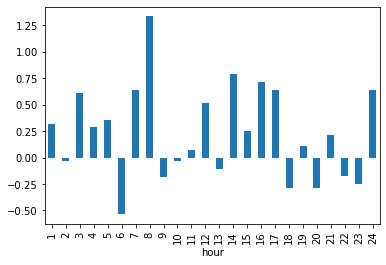

In [58]:
coin = 'MATICUSDT'
one_data = crypto_data[(crypto_data.crypto == coin)]
#latest = datetime.fromtimestamp(int(one_data.index.max())/1000)
one_data['time'] =one_data.index
one_data.time = one_data.time.apply(lambda x: datetime.fromtimestamp(int(x)/1000))
one_data['hour'] = one_data.time.apply(lambda x: x.hour+1)
one_data['diff_per_hour'] = round(((one_data.close - one_data.close.shift(1))/one_data.close)*100, 0)
one_data =one_data[(one_data.time > datetime.today()- timedelta(days=30))]

var = one_data.groupby('hour').diff_per_hour.mean()
var.plot(kind = 'bar')

In [59]:
one_data.to_csv('Matic_30Days.csv')

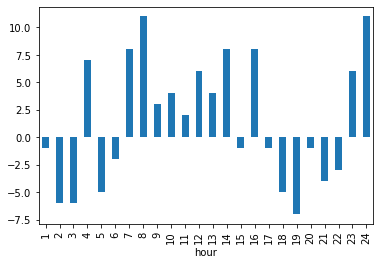

In [55]:
var = one_data.groupby('hour').diff_per_hour.sum()
var.plot(kind = 'bar')

In [ ]:
latest = datetime.fromtimestamp(int(one[(crypto_data.crypto == cryp)].index.max())/1000)
latest = latest-timedelta(days=1)
#flow = client.get_historical_klines(cryp, interv, "15 May, 2021")
flow = client.get_historical_klines(cryp, interv, latest.strftime("%d %B, %Y"))

In [21]:
latest.hour

9